<a href="https://colab.research.google.com/github/marsyang2410/predictive_learning_from_data/blob/main/Self_Organizing_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

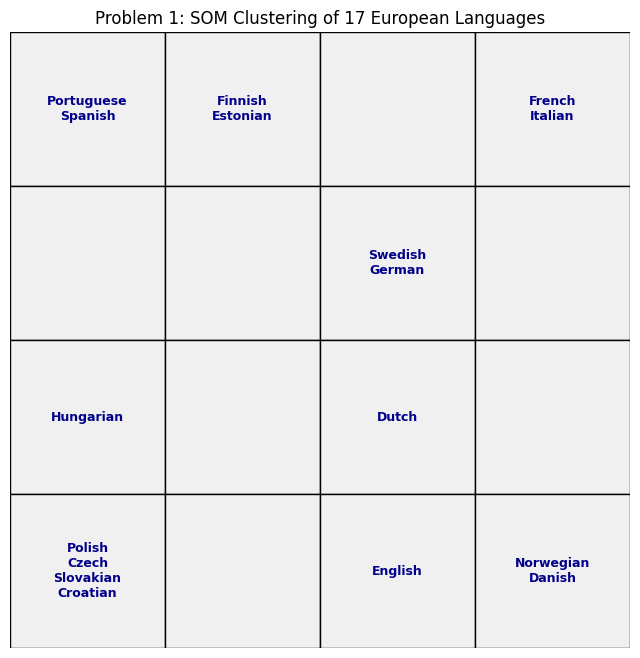

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Load
df = pd.read_csv('euro_lang.csv')
X = df.T.values
languages = df.columns.tolist()

# SOM paramenter config
num_samples = X.shape[0]
grid_h, grid_w = 4,4
num_neurons = grid_h * grid_w
num_iterations = 70   # how do we decide?
sigma_start = 1.0     # initial neighborhood size
sigma_end = 0.15      # ending neigbor size

# create list of coordinates for 4x4 grid
coords = np.zeros((num_neurons, 2))
for i in range(num_neurons):
  coords[i] = [i // grid_w, i % grid_w]

# initilize weights randomly
np.random.seed(42)
indices = np.random.choice(num_samples, num_neurons, replace=True)
weights = X[indices].astype(float)

# START: Training Loops
for t in range(max_iter):
    # Calculate the neighborhood radius for this step (shrinks over time)
    sigma = sigma_start + (sigma_end - sigma_start) * (t / max_iter)

    # A. Find the Best Matching Unit (BMU) for every language
    bmu_indices = np.zeros(num_samples, dtype=int)
    for i in range(num_samples):
        # Measure distance from this language to all 16 grid units
        dists = np.linalg.norm(weights - X[i], axis=1)
        bmu_indices[i] = np.argmin(dists)

    # B. Update the Grid (Batch Update)
    new_weights = np.zeros_like(weights)

    for j in range(num_neurons):
        numerator = np.zeros(X.shape[1])
        denominator = 0.0

        r_j = coords[j] # Coordinate of the current grid unit we are updating

        for i in range(num_samples):
            c = bmu_indices[i] # The BMU for language i
            r_c = coords[c]    # Coordinate of that BMU

            # Distance between the unit we are updating and the BMU
            dist_sq = np.sum((r_c - r_j)**2)

            # Gaussian Neighborhood Function (The "Influence")
            h = np.exp(-dist_sq / (2 * sigma**2))

            # Accumulate the weighted sum
            numerator += h * X[i]
            denominator += h

        # Set the new weight for this unit
        if denominator > 0:
            new_weights[j] = numerator / denominator
        else:
            new_weights[j] = weights[j]

    weights = new_weights

# visualize the SOM map
# Figure out where everyone ended up finally
final_mapping = {}
for i in range(num_samples):
    dists = np.linalg.norm(weights - X[i], axis=1)
    bmu_idx = np.argmin(dists)
    r, c = int(coords[bmu_idx][0]), int(coords[bmu_idx][1])

    if (r, c) not in final_mapping:
        final_mapping[(r, c)] = []
    final_mapping[(r, c)].append(languages[i])

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-0.5, grid_w - 0.5)
ax.set_ylim(grid_h - 0.5, -0.5) # Flip Y axis so (0,0) is top-left

# Draw the 4x4 Grid
for x in range(grid_w):
    for y in range(grid_h):
        # Draw box
        rect = plt.Rectangle((x-0.5, y-0.5), 1, 1, fill=True, color='#f0f0f0', ec='black')
        ax.add_patch(rect)

        # Add Language Names
        if (y, x) in final_mapping:
            langs = final_mapping[(y, x)]
            text_str = "\n".join(langs)
            ax.text(x, y, text_str, ha='center', va='center', fontsize=9, fontweight='bold', color='darkblue')

ax.set_title("Problem 1: SOM Clustering of 17 European Languages")
ax.axis('off')
plt.show()